# Case 1 Nils Baker

## Read Data and Import Packages

In [46]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [38]:
data = pd.read_excel('Case1.xlsx', sheetname='Nils Baker data')
data.head()

,ID,Total Households in Area,Households with Account,Inside/Outside Footprint
0,1,1772960,17563,Outside
1,2,1345209,14547,Outside
2,3,960434,10847,Outside
3,4,928274,18133,Inside
4,5,893995,5291,Outside


In [9]:
len(data[data["Inside/Outside Footprint"] == "Outside"])

67

## Data Exploration

In [10]:
data.describe()

,ID,Total Households in Area,Households with Account
count,120.000000,1.200000e+02,120.000000
mean,60.500000,1.626027e+05,1992.258333
std,34.785054,2.769554e+05,3301.492956
min,1.000000,1.799000e+03,13.000000
25%,30.750000,2.886075e+04,326.000000
50%,60.500000,4.608250e+04,565.000000
75%,90.250000,1.524350e+05,2092.000000
max,120.000000,1.772960e+06,18133.000000


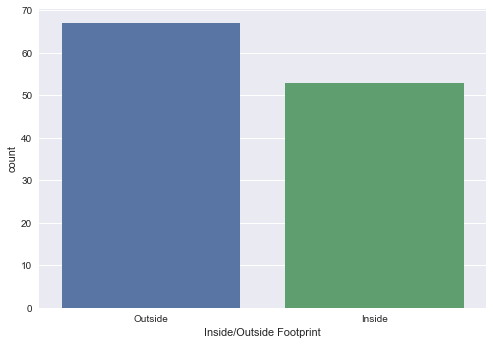

In [11]:
sns.countplot(data=data, x='Inside/Outside Footprint')
plt.show()

## Data Preprocessing

In [40]:
data_2 = data.copy()

In [26]:
data["Households with Account"] = data["Households with Account"].astype(float)
data["Coverage Ratio"] = data["Households with Account"] / data["Total Households in Area"]
data = data.drop(["ID","Total Households in Area", "Households with Account"],axis=1)
data.columns = ["Branch","Coverage Ratio"]
data["Branch"] = data["Branch"].apply(lambda x: 1 if x == 'Inside' else 0)
data.head()

,Branch,Coverage Ratio
0,0,0.009906
1,0,0.010814
2,0,0.011294
3,1,0.019534
4,0,0.005918


In [41]:
data_2 = data_2.drop(["ID"],axis=1)
data_2.columns = ["Total Households in Area", "Households with Account","Branch"]
data_2["Branch"] = data_2["Branch"].apply(lambda x: 1 if x == 'Inside' else 0)
max_total = max(data_2["Total Households in Area"])
min_total = min(data_2["Total Households in Area"])
max_acc = max(data_2["Households with Account"])
min_acc = min(data_2["Households with Account"])
data_2["Total Households in Area"] = data_2["Total Households in Area"].apply(lambda x: float(x-min_total)/(max_total - min_total))
data_2["Households with Account"] = data_2["Households with Account"].apply(lambda x: float(x-min_acc)/(max_acc - min_acc))
data_2.head()

,Total Households in Area,Households with Account,Branch
0,1.000000,0.968543,0
1,0.758491,0.802097,0
2,0.541247,0.597903,0
3,0.523089,1.000000,1
4,0.503735,0.291280,0


In [30]:
max(data["Coverage Ratio"])

0.1366135495294008

## Correlation Analysis

In [27]:
data.corr()

,Branch,Coverage Ratio
Branch,1.000000,0.152333
Coverage Ratio,0.152333,1.000000


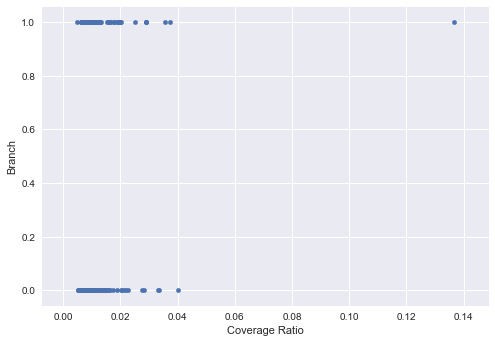

In [29]:
data.plot(kind='scatter',x='Coverage Ratio',y='Branch')
plt.show()

In [31]:
data = data[data["Coverage Ratio"] != max(data["Coverage Ratio"])]
data.corr()

,Branch,Coverage Ratio
Branch,1.000000,0.120973
Coverage Ratio,0.120973,1.000000


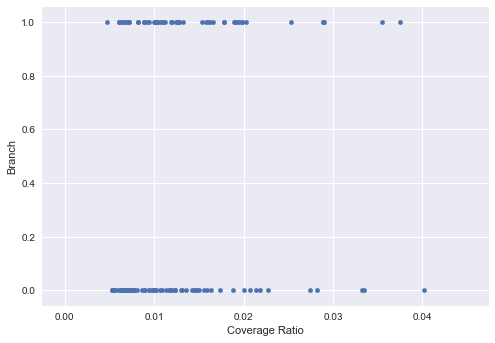

In [32]:
data.plot(kind='scatter',x='Coverage Ratio',y='Branch')
plt.show()

## Linear Regression

In [56]:
X = sm.add_constant(data_2[["Total Households in Area", "Branch"]])
Y = data_2["Households with Account"]
result = sm.OLS(Y, X).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Households with Account   R-squared:                       0.834
Model:                                 OLS   Adj. R-squared:                  0.831
Method:                      Least Squares   F-statistic:                     293.6
Date:                     Sun, 21 Jan 2018   Prob (F-statistic):           2.52e-46
Time:                             11:27:26   Log-Likelihood:                 142.23
No. Observations:                      120   AIC:                            -278.5
Df Residuals:                          117   BIC:                            -270.1
Df Model:                                2                                         
Covariance Type:                 nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.0008      0.011      0.074      0.941      -0.021       0.023
Total Households in Area     1.0835      0.046     23.535      0.000       0.992       1.175
Branch                       0.0227      0.014      1.576      0.118      -0.006       0.051
==============================================================================
Omnibus:                       79.819   Durbin-Watson:                   2.072
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              739.137
Skew:                           2.053   Prob(JB):                    3.15e-161
Kurtosis:                      14.444   Cond. No.                         7.64
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [57]:
print result.pvalues

const                       9.414671e-01
Total Households in Area    3.441288e-46
Branch                      1.177931e-01
dtype: float64
